# Import necessary libraries, modules

In [38]:
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib notebook


# Ensure running on local GPU

In [2]:
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

True

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
from tensorflow.python.client import device_lib
assert 'GPU' in str(device_lib.list_local_devices())

# confirm Keras sees the GPU (for TensorFlow 1.X + Keras)
from keras import backend
assert len(backend.tensorflow_backend._get_available_gpus()) > 0

# Data generator, model definition, compilation

In [35]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   zoom_range=0.3, 
                                   rotation_range=50,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_set_path = os.path.join(os.getcwd(), 'datasets/train')

val_set_path = os.path.join(os.getcwd(), 'datasets/val')

BATCH_SIZE = 64
TARGET_SIZE = (200,200)

train_generator = train_datagen.flow_from_directory(train_set_path,
                                                 target_size = TARGET_SIZE,
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'binary')

val_generator = val_datagen.flow_from_directory(val_set_path,
                                                target_size = TARGET_SIZE,
                                                batch_size = BATCH_SIZE,
                                                class_mode = 'binary')

model = Sequential([
    Conv2D(64,(4,4),input_shape=(200,200,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(4,4),input_shape=(200,200,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(4,4),input_shape=(200,200,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(1,activation='sigmoid')
])

mcp_save = keras.callbacks.ModelCheckpoint('best_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')

sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=['acc'])
model.summary()

Found 8755 images belonging to 2 classes.
Found 2328 images belonging to 2 classes.
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 197, 197, 64)      3136      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 95, 95, 64)        65600     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 44, 44, 64)        65600     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 22, 22, 64)        0         
____________________________________

# Train the model

In [ ]:
EPOCHS = 300
history = model.fit_generator(train_generator, 
                              steps_per_epoch=train_generator.n // BATCH_SIZE, 
                              epochs=EPOCHS,
                              validation_data=val_generator, 
                              validation_steps=val_generator.n // BATCH_SIZE, 
                              verbose=1,
                              callbacks = [mcp_save])  

Epoch 1/300
136/136 [==============================] - 96s 709ms/step - loss: 0.5764 - acc: 0.6892 - val_loss: 0.3871 - val_acc: 0.8537
Epoch 2/300
136/136 [==============================] - 110s 810ms/step - loss: 0.3922 - acc: 0.8269 - val_loss: 0.3107 - val_acc: 0.8498
Epoch 3/300
136/136 [==============================] - 119s 877ms/step - loss: 0.3235 - acc: 0.8641 - val_loss: 0.2412 - val_acc: 0.8865
Epoch 4/300
136/136 [==============================] - 124s 915ms/step - loss: 0.2822 - acc: 0.8834 - val_loss: 0.1531 - val_acc: 0.9231
Epoch 5/300
136/136 [==============================] - 125s 922ms/step - loss: 0.2392 - acc: 0.9016 - val_loss: 0.2325 - val_acc: 0.9134
Epoch 6/300
136/136 [==============================] - 127s 934ms/step - loss: 0.2102 - acc: 0.9136 - val_loss: 0.0933 - val_acc: 0.9342
Epoch 7/300
136/136 [==============================] - 131s 960ms/step - loss: 0.2030 - acc: 0.9157 - val_loss: 0.2602 - val_acc: 0.9293
Epoch 8/300
136/136 [=====================

Epoch 61/300
136/136 [==============================] - 141s 1s/step - loss: 0.0965 - acc: 0.9616 - val_loss: 0.1825 - val_acc: 0.9633
Epoch 62/300
136/136 [==============================] - 150s 1s/step - loss: 0.0790 - acc: 0.9699 - val_loss: 0.0225 - val_acc: 0.9814
Epoch 63/300
136/136 [==============================] - 151s 1s/step - loss: 0.0719 - acc: 0.9710 - val_loss: 0.0350 - val_acc: 0.9779
Epoch 64/300
136/136 [==============================] - 133s 977ms/step - loss: 0.0771 - acc: 0.9704 - val_loss: 0.0142 - val_acc: 0.9863
Epoch 65/300
136/136 [==============================] - 163s 1s/step - loss: 0.0994 - acc: 0.9605 - val_loss: 0.1186 - val_acc: 0.9660
Epoch 66/300
136/136 [==============================] - 152s 1s/step - loss: 0.0936 - acc: 0.9647 - val_loss: 0.0688 - val_acc: 0.9753
Epoch 67/300
136/136 [==============================] - 156s 1s/step - loss: 0.0805 - acc: 0.9707 - val_loss: 0.0602 - val_acc: 0.9779
Epoch 68/300
136/136 [==============================

In [4]:
model = keras.models.load_model('best_model.hdf5')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



# Test folder predictions

In [70]:
images = []
from keras.preprocessing import image
folder_path = 'datasets/test'
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(200, 200))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict_classes(images, batch_size=10)

# Random Test Examples

Fresh Stock!


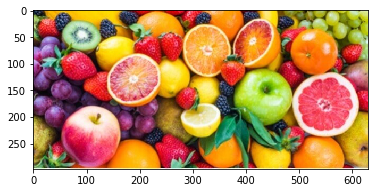

In [62]:
%matplotlib inline

image = 'test4.jpg'
test = cv2.imread(image,cv2.IMREAD_UNCHANGED)
plt.imshow(mpimg.imread(image))
test = cv2.resize(test,(200,200))
test = np.expand_dims(test,axis=0)
if model.predict(test)[0][0]:
    print('Rotten Stock!')
else:
    print('Fresh Stock!')

Rotten Stock!


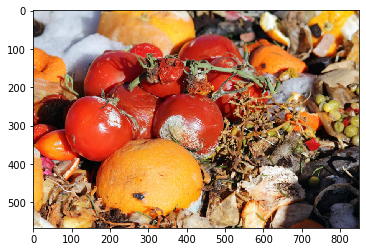

In [63]:
image = 'test5.jpg'
test = cv2.imread(image,cv2.IMREAD_UNCHANGED)
plt.imshow(mpimg.imread(image))
test = cv2.resize(test,(200,200))
test = np.expand_dims(test,axis=0)
if model.predict(test)[0][0]:
    print('Rotten Stock!')
else:
    print('Fresh Stock!')

Fresh Stock!


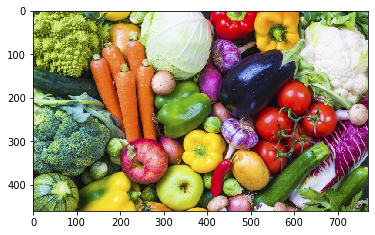

In [64]:
image = 'test6.jpg'
test = cv2.imread(image,cv2.IMREAD_UNCHANGED)
plt.imshow(mpimg.imread(image))
test = cv2.resize(test,(200,200))
test = np.expand_dims(test,axis=0)
if model.predict(test)[0][0]:
    print('Rotten Stock!')
else:
    print('Fresh Stock!')

Rotten Stock!


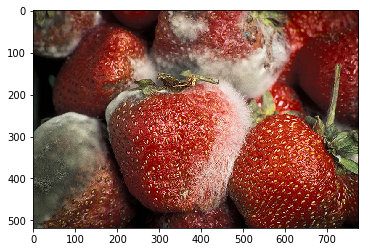

In [65]:
image = 'test7.jpg'
test = cv2.imread(image,cv2.IMREAD_UNCHANGED)
plt.imshow(mpimg.imread(image))
test = cv2.resize(test,(200,200))
test = np.expand_dims(test,axis=0)
if model.predict(test)[0][0]:
    print('Rotten Stock!')
else:
    print('Fresh Stock!')

Fresh Stock!


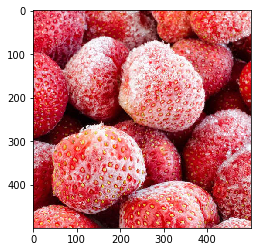

In [67]:
image = 'test9.jpg'
test = cv2.imread(image,cv2.IMREAD_UNCHANGED)
plt.imshow(mpimg.imread(image))
test = cv2.resize(test,(200,200))
test = np.expand_dims(test,axis=0)
if model.predict(test)[0][0]:
    print('Rotten Stock!')
else:
    print('Fresh Stock!')

Fresh Stock!


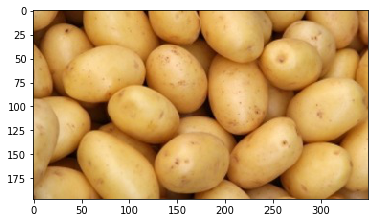

In [71]:
image = 'test10.jpg'
test = cv2.imread(image,cv2.IMREAD_UNCHANGED)
plt.imshow(mpimg.imread(image))
test = cv2.resize(test,(200,200))
test = np.expand_dims(test,axis=0)
if model.predict(test)[0][0]:
    print('Rotten Stock!')
else:
    print('Fresh Stock!')

Rotten Stock!


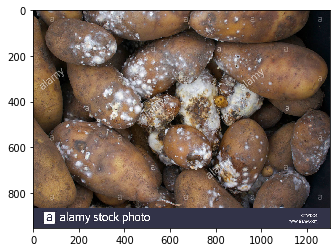

In [74]:
image = 'test11.jpg'
test = cv2.imread(image,cv2.IMREAD_UNCHANGED)
plt.imshow(mpimg.imread(image))
test = cv2.resize(test,(200,200))
test = np.expand_dims(test,axis=0)
if model.predict(test)[0][0]:
    print('Rotten Stock!')
else:
    print('Fresh Stock!')